In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spotify.csv')

In [3]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [4]:
#1: Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

#Checking null value
print(df.isnull().sum())

#No null values found in the dataset.

#Checking duplicates rows
df.duplicated().sum()

#Duplicate rows founded

#dropping duplicates rows
df = df.drop_duplicates()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(413, 5)

Track Name                               Popularity
20 Min                                   84            1
3 Headed Goat (feat. Lil Baby & Polo G)  75            1
3D (feat. Jack Harlow)                   84            1
4:44                                     74            1
6 Foot 7 Foot                            74            1
                                                      ..
pop ur shit                              79            1
prove it                                 82            1
pushin P (feat. Young Thug)              75            1
redrum                                   96            1
rockstar (feat. 21 Savage)               85            1
Name: count, Length: 413, dtype: int64


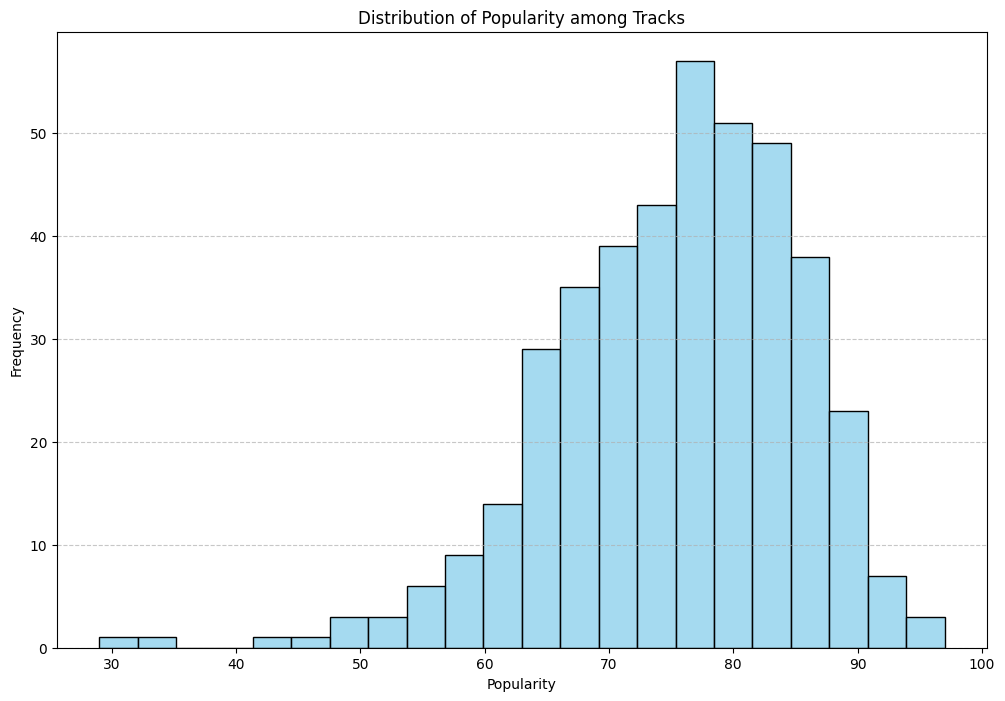

In [7]:
#2: What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
dist = df.groupby('Track Name')['Popularity'].value_counts()
print(dist)
#Visualization using H/istogram
plt.figure(figsize = (12, 8))
sns.histplot(df['Popularity'], color = 'skyblue')
plt.title('Distribution of Popularity among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

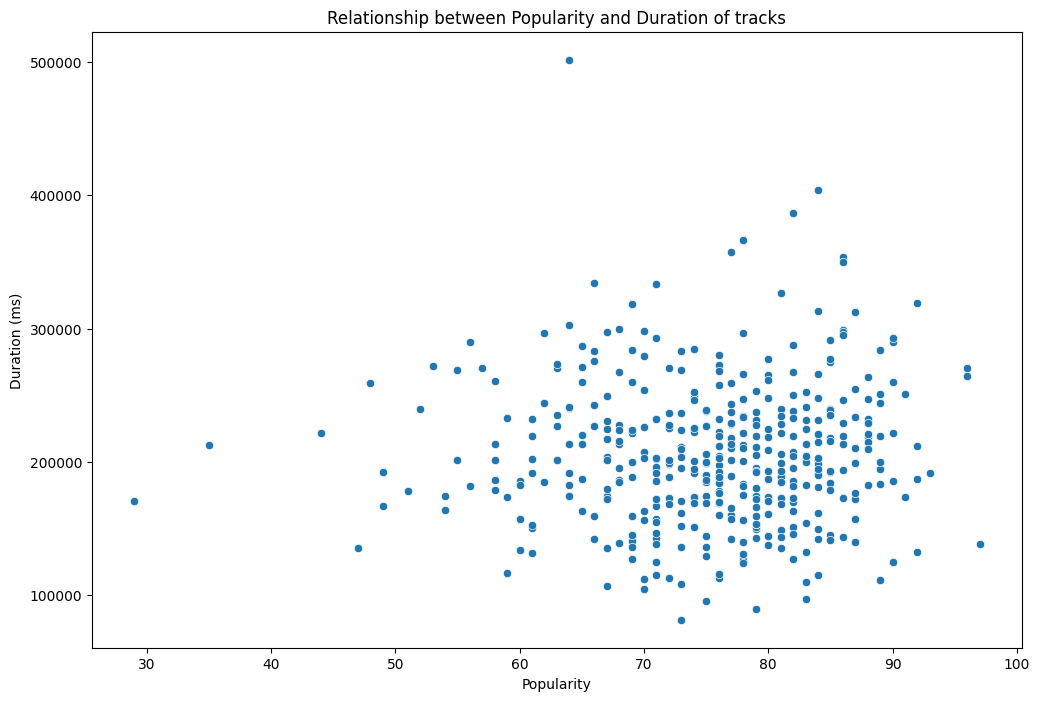

In [8]:
#3: Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'Popularity', y = 'Duration (ms)', data = df)
plt.title('Relationship between Popularity and Duration of tracks')
plt.show()

In [9]:
#Insights
#Most of the songs have the popularity between 70 to 85 with duration approximately between 150000 ms to 250000 ms

The artist with the highest number of tracks is 'Drake' with 17 tracks.


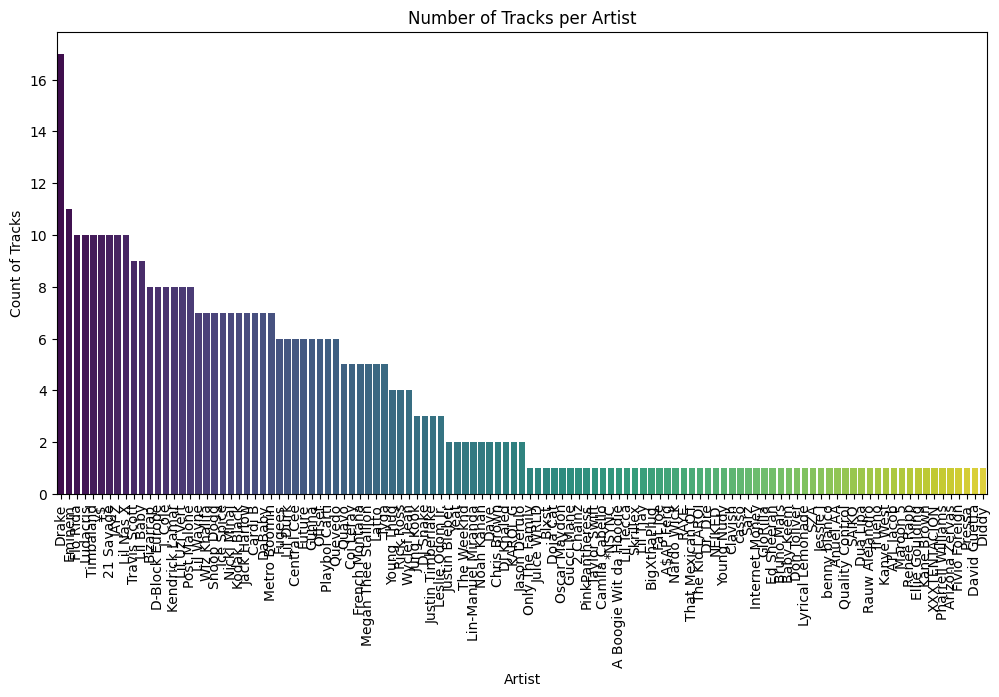

In [10]:
#4: Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

# Count the number of tracks for each artist
track_counts = df['Artist'].value_counts()

# Find the artist with the most tracks
top_artist = track_counts.idxmax()
max_tracks = track_counts.max()

print(f"The artist with the highest number of tracks is '{top_artist}' with {max_tracks} tracks.")

# Visualize the count of tracks for each artist
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Artist', order=df['Artist'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title("Number of Tracks per Artist")
plt.xlabel("Artist")
plt.ylabel("Count of Tracks")
plt.show()


In [11]:
#5: What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

# top 5 least popular tracks in the dataset
least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print(least_popular)

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [20]:
#6: Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
top_5_artist = df.groupby('Artist')['Popularity'].mean().sort_values(ascending = False).head()
print(top_5_artist)

print("Artist with highest popularity on Average is :", top_5_artist.idxmax())

# Calculate the average popularity for each artist
artist_avg_popularity = df.groupby('Artist')['Popularity'].mean().reset_index()

# Sort the artists by average popularity
artist_avg_popularity = artist_avg_popularity.sort_values(by='Popularity', ascending=False)

# Display the results
print("Average Popularity for Each Artist:")
print(artist_avg_popularity)


Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64
Artist with highest popularity on Average is : cassö
Average Popularity for Each Artist:
             Artist  Popularity
113           cassö   92.000000
104          Trueno   89.000000
24     David Guetta   87.000000
103    Travis Scott   86.555556
114              ¥$   85.100000
..              ...         ...
89             RAYE   55.000000
107     Wyclef Jean   54.500000
7    Arizona Zervas   54.000000
52    Justin Bieber   49.000000
85           Pressa   29.000000

[115 rows x 2 columns]


In [21]:
#7: For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
# Step 1: Calculate the average popularity for each artist and find the top 5 artists
top_5_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5).index

# Step 2: Find the most popular track for each of these artists
most_popular_tracks = []

for artist in top_5_artists:
    artist_tracks = df[df['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    most_popular_tracks.append((artist, most_popular_track['Track Name'], most_popular_track['Popularity']))

# Step 3: Display the results
print("Most Popular Tracks for the Top 5 Most Popular Artists:")
for artist, track, popularity in most_popular_tracks:
    print(f"Artist: {artist}, Track: {track}, Popularity: {popularity}")


Most Popular Tracks for the Top 5 Most Popular Artists:
Artist: cassö, Track: Prada, Popularity: 92
Artist: Trueno, Track: Mamichula - con Nicki Nicole, Popularity: 89
Artist: David Guetta, Track: Baby Don't Hurt Me, Popularity: 87
Artist: Travis Scott, Track: FE!N (feat. Playboi Carti), Popularity: 93
Artist: ¥$, Track: CARNIVAL, Popularity: 96


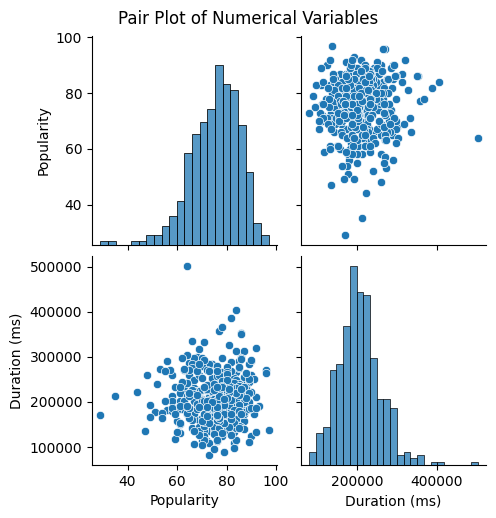

In [35]:
#8: Visualize relationships between multiple numerical variables simultaneously using a pair plot.
sns.pairplot(df)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

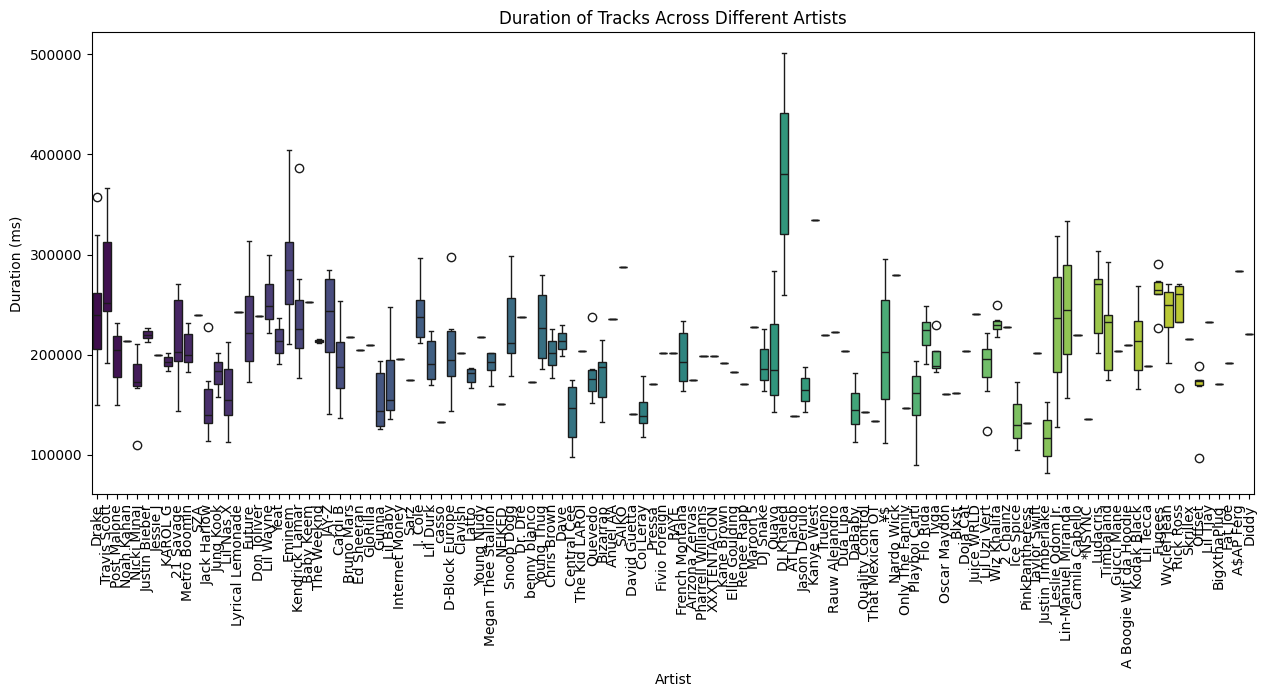

In [43]:
#9: Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
plt.figure(figsize = (15, 6))
sns.boxplot(x = 'Artist', y = 'Duration (ms)', data = df, palette = 'viridis')
plt.xticks(rotation = 90)
plt.title('Duration of Tracks Across Different Artists')
plt.show()

In [44]:
#Insights:
# Some artists show consistent track lengths, while others have more variation.
# Differences in medians indicate some artists produce longer or shorter tracks on average.
# Outliers highlight unusually short or long tracks for certain artists.
# Artists with narrower boxes/violins have consistent track lengths, while wider ones show diversity.
# Clear differences in track duration trends across top artists can indicate style or genre preferences.


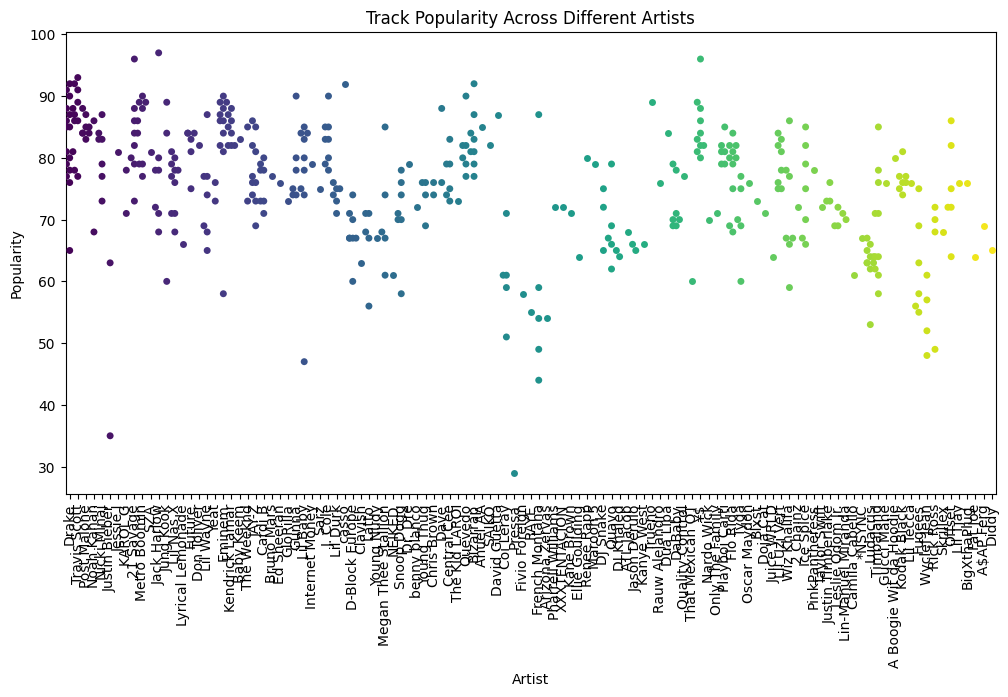

In [49]:
#10: How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize = (12, 6))
sns.swarmplot(x = 'Artist', y = 'Popularity', data = df, palette = 'viridis')
plt.xticks(rotation = 90)
plt.title('Track Popularity Across Different Artists')
plt.show()

### Insights:
1. **Popularity Spread**: Some artists have consistent track popularity, while others show more variation.
2. **Central Tendency**: Artists with higher median popularity consistently produce popular tracks.
3. **Outliers**: Some tracks may be outliers with exceptionally high or low popularity.
4. **Comparing Artists**: Certain artists maintain high popularity across tracks, while others vary more in track success.